In [19]:
#Load other modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #Graphics
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier  #Random Forest algorithm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score

In [20]:
#load the datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [21]:
#Printing the size of the dataframe
print ("Training dataset has %i observations and %i variables" %(train.shape[0], train.shape[1]))
print ("Testing dataset has %i observations and %i variables" %(test.shape[0], test.shape[1]))

Training dataset has 42000 observations and 785 variables
Testing dataset has 28000 observations and 784 variables


In [22]:
#check few rows
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#Seperate the target and independant variables
df_x=train.iloc[:,1:]
df_y=train.iloc[:,0]

In [24]:
def print_image(row, df):
    temp=df.iloc[row,:].values
    temp = temp.reshape(28,28).astype('uint8')
    plt.imshow(temp)

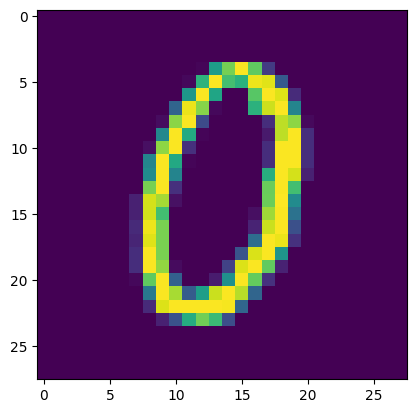

In [25]:
print_image(5, df_x)

In [26]:
#Check the frequency of each number
df_y.value_counts().sort_index()

0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

<Axes: ylabel='count'>

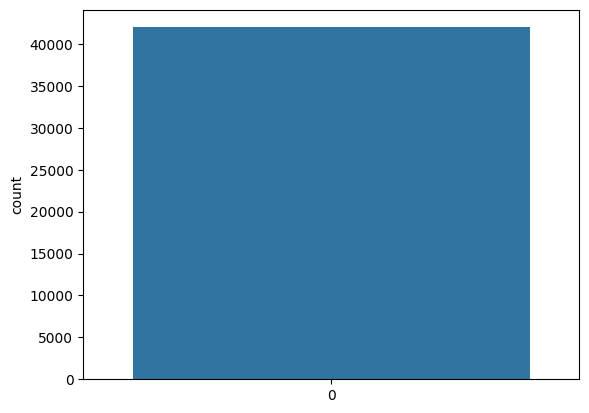

In [27]:
sns.countplot(df_y)

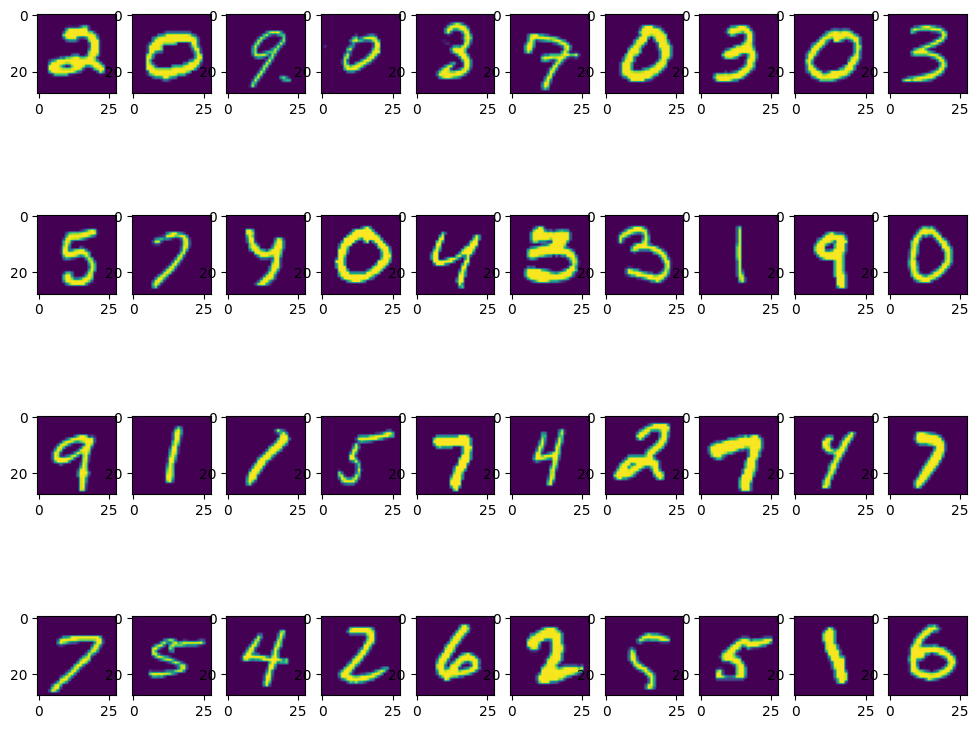

In [28]:
plt.figure(figsize=(12,10))
for i in range(40):
    plt.subplot(4, 10, i+1)
    print_image(i, test)

In [29]:
#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(33600, 784)
(8400, 784)


In [30]:
#training random Forest
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier()

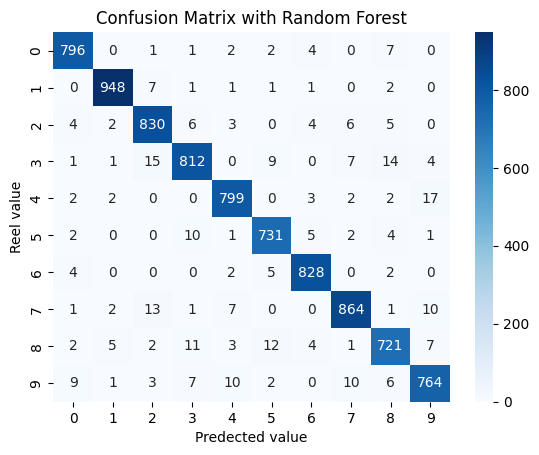

In [33]:
pred=rf.predict(X_test)
from sklearn.metrics import classification_report , confusion_matrix
cm = confusion_matrix(y_test,pred)
# Visualiser la matrice de confusion avec seaborn
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix with Random Forest')
plt.xlabel('Predected value')
plt.ylabel('Reel value')
plt.show()

In [34]:
pred=rf.predict(X_test)
print ("Classification Report")
print(classification_report(y_test, pred))

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       813
           1       0.99      0.99      0.99       961
           2       0.95      0.97      0.96       860
           3       0.96      0.94      0.95       863
           4       0.96      0.97      0.97       827
           5       0.96      0.97      0.96       756
           6       0.98      0.98      0.98       841
           7       0.97      0.96      0.96       899
           8       0.94      0.94      0.94       768
           9       0.95      0.94      0.95       812

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



# ***Cross validation***

In [35]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
model=RandomForestClassifier(n_estimators=100)
cv = RepeatedStratifiedKFold(n_splits=20,n_repeats=3,random_state=1)
n_scores= cross_val_score(model,X_train,y_train,scoring='accuracy',cv=cv,n_jobs=-1,error_score='raise')

In [40]:
print("Accuracy: %.3f (%.3f)" % (np.mean(n_scores), np.std(n_scores)))

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)

Accuracy: 0.963 (0.005)


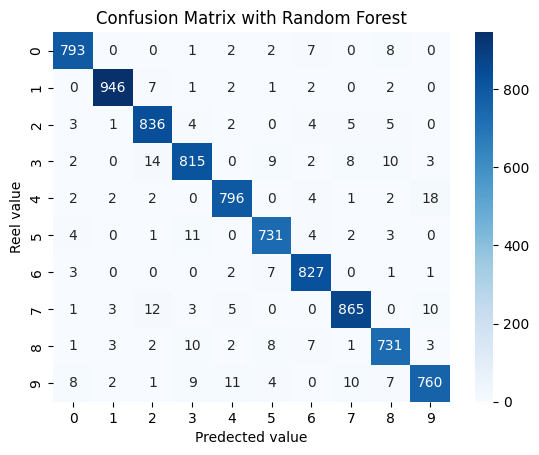

In [39]:
# Visualiser la matrice de confusion avec seaborn
sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix with Random Forest')
plt.xlabel('Predected value')
plt.ylabel('Reel value')
plt.show()